![](img/header.png)

# SIG Data & Analytics 15/09/20

# Klim Mikhailov - Machine Learning Practicum

## Machine Learning - "statistics on steroids"

> **"If you torture the data enough, nature will always confess."** – Ronald Coase



![Wikipedia entry](img/wiki.png)

## Scikit-learn

Scikit-learn biedt een groot aantal algoritmen in machine learning die zijn verenigd onder een gemeenschappelijke en intuïtieve API.

* Eenvoudige en efficiënte tools voor datamining en data-analyse
* Toegankelijk voor edereen en herbruikbaar in verschillende contexten
* Gebouwd op _NumPy_, _SciPy_ en _matplotlib_
* Open source, commercieel bruikbaar - BSD-licentie

## [Overzicht van technieken die worden gebruikt bij machine learning](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

![Scikit-learn topic areas](img/sklearn-topics.png)

## Basis Machine Learning algorimen

### Classificatie

Classificatie is een vorm van supervised leren waarbij de doelen voor een voorspelling een reeks categorische waarden zijn.

### Regressie

Regressie is een vorm van supervised leren waarbij de doelen voor een voorspelling kwantitatieve of continue waarden zijn.

### Clustering

Clustering is een vorm van unsupervised leren waarbij je overeenkomsten wilt identificeren tussen verzamelingen items zonder een *voorafgaand* classificatieschema. Je kunt al dan niet een *a priori* hebben over het aantal categorieën.

## Overfitting en Underfitting

- _Overfitting (hoge variance)._ Als we een model nauwkeurig trainen op basis van de gegevens zelf, het is zeer onwaarschijnlijk dat het model zich goed uitbreidt naar nieuwe gegevens. Wordt beperkt door grotere datasets.
- _Underfitting (hoge bias)._ Als we een model kiezen dat weinig mate van detail heeft die nodig is om het onderliggende fenomeen in de echte wereld weer te geven, krijgen we een ondergeschikt model.

In [66]:
# define necessary libraries
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=False)

In [5]:
def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

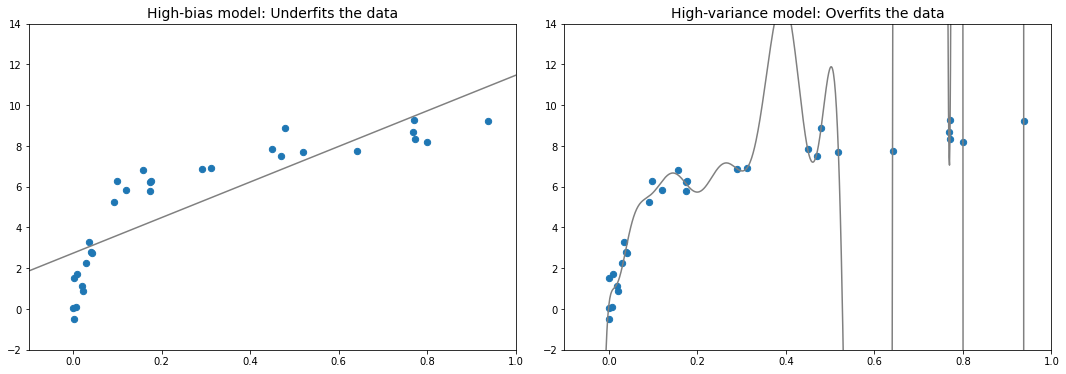

In [7]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

fig.savefig('img/bias-variance.png')

## Onze handen vuil maken

We moeten onze gegevens opsplitsen in trainings- en test- sets, en daarbinnen staan veel kolommen met gegevens bekend als *features* en slechts één kolom bekend als het *target*. Het verschil tussen classificatie en regressie is of het terget categorisch of continu is.

<img src='img/supervised_workflow.png' width=40% align="center"/>

## Bekijk altijd eerst je gegevens

> **"80% of the time spent doing data analysis is doing data cleanup."** –Every Data Scientist

In [13]:
import seaborn as sns
df = sns.load_dataset("anscombe")
df.pivot(columns='dataset').describe()

x                                           y             \
dataset          I         II        III         IV          I         II   
count    11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean      9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std       3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min       4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%       6.500000   6.500000   6.500000   8.000000   6.315000   6.695000   
50%       9.000000   9.000000   9.000000   8.000000   7.580000   8.140000   
75%      11.500000  11.500000  11.500000   8.000000   8.570000   8.950000   
max      14.000000  14.000000  14.000000  19.000000  10.840000   9.260000   

                               
dataset        III         IV  
count    11.000000  11.000000  
mean      7.500000   7.500909  
std       2.030424   2.030579  
min       5.390000   5.250000  
25%       6.250000   6.170000  
50%       7.110000   7.040000  
75%       7.980000   8.190000  
max      12.740000  12.500000

Correlaties van de features zijn identiek:

In [14]:
import numpy as np
df_1 = df[df.dataset=='I']
df_2 = df[df.dataset=='II']
df_3 = df[df.dataset=='III']
df_4 = df[df.dataset=='IV']

(np.corrcoef(df_1.x, df_1.y)[1,0],
 np.corrcoef(df_2.x, df_2.y)[1,0],
 np.corrcoef(df_3.x, df_3.y)[1,0],
 np.corrcoef(df_4.x, df_4.y)[1,0])

(0.8164205163448399,
 0.8162365060002428,
 0.8162867394895984,
 0.8165214368885029)

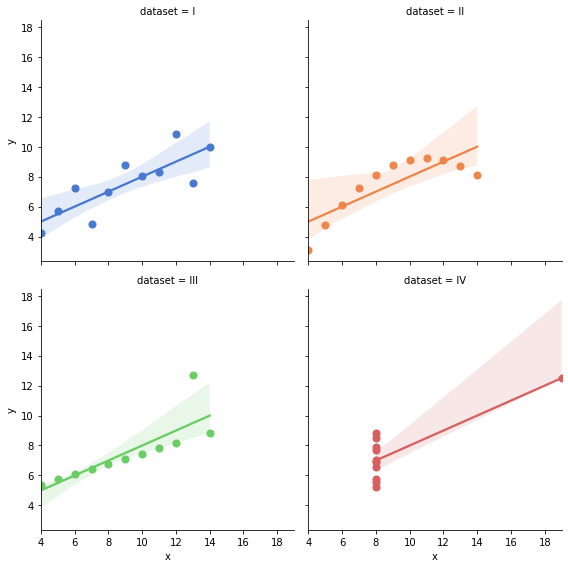

In [15]:
%matplotlib inline
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

### [The Datasaurus](https://www.autodeskresearch.com/publications/samestats)

<img src="img/DataDino-600x455.gif" width="50%"/>

## Voorbeeldatasets

Een aantal voorbeelddatasets zijn bij scikit-learn inbegrepen, ofwel al gebundeld met een `load_*()` functie voor de kleinere of met een `fetch_*()` functie voor de grotere die online kunnen worden verkregen. De `make_*()` functies creëren synthetische datasets met enige willekeur bij het genereren.

In [18]:
from sklearn import datasets
[attr for attr in dir(datasets) if not attr.startswith('_')]

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

## Classificatie

<img src='img/iris.png'/>

De gegevens die we voor dit voorbeeld zullen gebruiken, zijn de Iris-gegevensset, een klassieke gegevensset in machine learning en statistiek. Het is opgenomen in scikit-learn in de datasets-module. We kunnen het laden door de load_iris:

In [19]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [40]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [39]:
print(iris_dataset['DESCR'][:1208])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [41]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [42]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [45]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [43]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [44]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [46]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [47]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [49]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


De betekenissen van de getallen worden gegeven door de `iris['target_names']` array: 0 betekent _setosa_, 1 betekent _versicolor_ en 2 betekent _virginica_.

## Train/Test Split

<img src='img/train_test_split_matrix.png' width="66%"/>

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [52]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [53]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## First Things First: kijk naar je gegevens

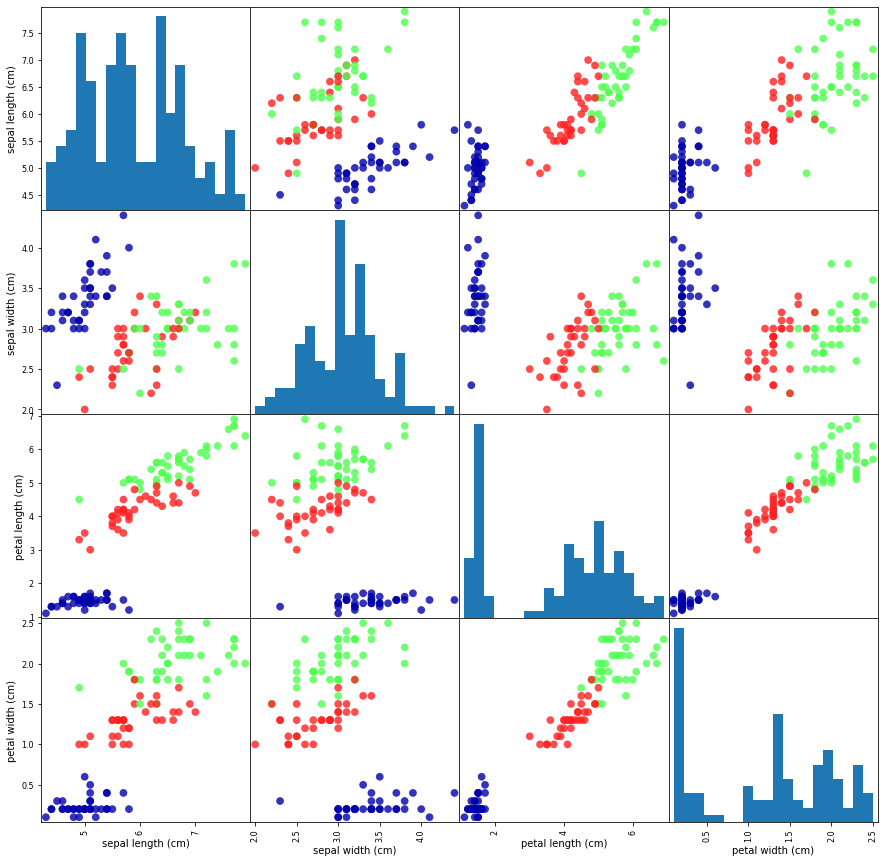

In [61]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

Uit de grafieken kunnen we zien dat de drie klassen relatief goed gescheiden lijken te zijn met behulp van de afmetingen van sepal en petal. Dit betekent dat een machine learning-model waarschijnlijk zal kunnen leren om ze te scheiden.

## Ons eerste model: k-Nearest Neighbors

Om een voorspelling te doen voor een nieuw datapunt, het algoritme zoekt het punt in de trainingsset dat het dichtst bij het nieuwe punt ligt. Vervolgens wijst het het label van dit trainingspunt toe aan het nieuwe datapunt.

In [63]:
# instantiate the Estimator class into an object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [67]:
# build the model on the training dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [68]:
# making predictions

In [69]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [70]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


## Model evaluatie

In [71]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [72]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [73]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Voor dit model is de nauwkeurigheid van de testset ongeveer 0,97, wat betekent dat we de juiste voorspelling hebben gedaan voor 97% van de irissen in de testset. Onder sommige wiskundige aannames betekent dit dat we kunnen verwachten dat ons model in 97% van de gevallen correct is voor nieuwe irissen.

## Andere metrics

Classificatietabel:

| Predict/Actual | Positive | Negative |
|----------------|----------|----------|
| Positive       |    1     |    0     |
| Negative       |    2     |   997    | 

$$\text{Precision} = \frac{true\: positive}{true\: positive + false\: positive}$$

$$\text{Recall} = \frac{true\: positive}{true\: positive + false\: negative}$$

$$\text{F1} = 2 \times \cfrac{precision \times recall}{precision + recall}$$

## Regressie